## ___Building Regression Model using PYCARET Package___

In [0]:
# installing Pycaret Package

!pip install pycaret

### ___Initializing Data___

#### ___Step 1: Getting the Data___

_Data can be loaded into the environment using the traditional way with the help of Pandas library._

_But for learning and testing purposes, pycaret has some inbuilt datasets which can be accessed using:_

```
get_data(dataset, save_copy=False, profile=False)
```

_To get list of datasets: https://pycaret.org/get-data/_

In [1]:
from pycaret.datasets import get_data 

dt = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
dt.shape

(6000, 8)

In [0]:
dataset = get_data('diamond', profile=True)
#  profile: bool, default = False
#    If set to true, a data profile for Exploratory Data Analysis will be displayed in an interactive HTML report. 

# This uses pandas_profiling library

In [4]:
# Taking out 10% of data to test the final model and pass it as unseen dataset.

data = dt.sample(frac=0.9, random_state=40).reset_index(drop=True)
data_unseen = dt.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions (600, 8)


#### ___Step 2: Setting up Environment___

_Depending on the type of modelling to perform, one of the six available modules must be imported in your python environment. Importing a module prepares an environment for specific task._

_1.	**Classification**:	from pycaret.classification import *_

_2.	**Regression**:	from pycaret.regression import *_

_3.	**Clustering**:	from pycaret.clustering import *_

_4.	**Anomaly Detection**:	from pycaret.anomaly import *_

_5.	**Natural Language Processing**:	from pycaret.nlp import *_

_6.	**Association Rule Mining**:	from pycaret.arules import *_

```
setup(data, target, 
 train_size = 0.7, 
 sampling = True, 
 sample_estimator = None, 
 categorical_features = None, 
 categorical_imputation = ‘constant’,
 ordinal_features = None, 
 high_cardinality_features = None, 
 high_cardinality_method = ‘frequency’, 
 numeric_features = None, 
 numeric_imputation = ‘mean’, 
 date_features = None, 
 ignore_features = None, 
 normalize = False, 
 normalize_method = ‘zscore’, 
 transformation = False, 
 transformation_method = ‘yeo-johnson’, 
 handle_unknown_categorical = True, 
 unknown_categorical_method = ‘least_frequent’, 
 pca = False, pca_method = ‘linear’, 
 pca_components = None, 
 ignore_low_variance = False, 
 combine_rare_levels = False, 
 rare_level_threshold = 0.10, 
 bin_numeric_features = None, 
 remove_outliers = False, 
 outliers_threshold = 0.05, 
 remove_multicollinearity = False, 
 multicollinearity_threshold = 0.9, 
 create_clusters = False, 
 cluster_iter = 20, 
 polynomial_features = False, 
 polynomial_degree = 2, 
 trigonometry_features = False, 
 polynomial_threshold = 0.1, 
 group_features = None, 
 group_names = None, 
 feature_selection = False, 
 feature_selection_threshold = 0.8, 
 feature_interaction = False, 
 feature_ratio = False,
 interaction_threshold = 0.01, 
 transform_target = False, 
 transform_target_method = ‘box-cox’, 
 session_id = None, 
 silent=False,
 profile = False)
```

In [5]:
# The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 
# setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.

from pycaret.regression import * 

reg_modelling = setup(data = data, target ='Price')

# This setup function will automatically get the data types of columns and if you wish to change any data type you can change it before this step.

# With passing other arguements in setup function we can change value for any of the 41 steps.

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2405
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### ___Model Training___

#### ___Step 4: Compare Models___

_This function trains and compares common evaluation metrics using k-fold cross validation for all the available models in the library of the module you have imported. The evaluation metrics used are:_

* _**Classification**: Accuracy, AUC, Recall, Precision, F1, Kappa_
* _Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE_

_The output of the function is a table showing averaged score of all models across the folds. The number of folds can be defined using fold parameter within compare_models function. By default, the fold is set to 10. The table is sorted (highest to lowest) by the metric of choice and can be defined using sort parameter. By default, table is sorted by Accuracy for classification experiments and R2 for regression experiments. Certain models are prevented for comparison because of their longer run-time. In order to bypass this prevention, turbo parameter can be set to False._

```
compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
```

In [6]:
compare_models()

# This code ran almost 22 regression models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,608.031400,1809176.511300,1289.675700,0.982800,0.065700,0.048700
1,Extra Trees Regressor,714.875400,2405415.773200,1493.504700,0.976600,0.079000,0.058500
2,Random Forest,732.147900,2682029.624400,1576.979300,0.973900,0.078700,0.057500
3,Light Gradient Boosting Machine,745.128800,2938829.729500,1655.030200,0.971900,0.076200,0.056100
4,Gradient Boosting Regressor,877.823100,2923626.341300,1681.151700,0.971300,0.100100,0.076300
5,Extreme Gradient Boosting,908.017600,2964129.531000,1703.353000,0.970300,0.103900,0.079700
6,Decision Tree,976.439400,5162337.281800,2192.794000,0.948900,0.108500,0.076400
7,Ridge Regression,2371.495100,13689244.643600,3654.769900,0.864400,0.657600,0.280800
8,Lasso Regression,2367.024300,13696142.459000,3659.585300,0.864000,0.663800,0.279800
9,Lasso Least Angle Regression,2311.192700,13730600.939000,3660.198700,0.864000,0.661000,0.266200


#### ___Step 5: Create Models___

_https://pycaret.org/create-model/_

```
create_model(estimator = None, ensemble = False, method = None, fold = 10, round = 4, verbose = True)
```

_**ensemble**: True would result in an ensemble of estimator using the method parameter defined._

_method: ‘Bagging’ or ‘Boosting’, default = None: method must be defined when ensemble is set to True. Default method is set to None._

_This function returns a trained model object. setup() function must be called before using create_model()_

In [7]:
catboost_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,544.9416,9.352222e+05,967.0689,0.9885,0.0606,0.0470
1,612.8247,1.133840e+06,1064.8191,0.9856,0.0659,0.0516
2,637.7681,2.918879e+06,1708.4728,0.9705,0.0716,0.0525
3,591.9714,1.025796e+06,1012.8157,0.9901,0.0643,0.0480
4,673.5043,1.466215e+06,1210.8735,0.9846,0.0682,0.0510
5,536.0891,9.415172e+05,970.3181,0.9899,0.0590,0.0450
6,545.6526,1.175445e+06,1084.1792,0.9877,0.0735,0.0483
7,691.0242,3.111693e+06,1763.9992,0.9745,0.0659,0.0489
8,694.8559,4.300765e+06,2073.8286,0.9702,0.0647,0.0479
9,551.6824,1.082394e+06,1040.3816,0.9861,0.0638,0.0464


In [8]:
print(catboost_model)

In [9]:
dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,917.7416,6.767307e+06,2601.4048,0.9167,0.0976,0.0707
1,960.0809,3.461537e+06,1860.5206,0.9560,0.1116,0.0827
2,1045.7101,7.162851e+06,2676.3504,0.9275,0.1133,0.0816
3,904.2256,2.804641e+06,1674.7061,0.9730,0.1084,0.0738
4,930.9352,2.804804e+06,1674.7550,0.9706,0.1068,0.0784
5,923.4680,2.447116e+06,1564.3260,0.9737,0.1073,0.0770
6,955.2262,3.674286e+06,1916.8428,0.9616,0.1040,0.0759
7,1073.4444,1.181547e+07,3437.3637,0.9032,0.1171,0.0738
8,1128.1155,7.517336e+06,2741.7761,0.9479,0.1157,0.0765
9,925.4464,3.168026e+06,1779.8949,0.9593,0.1030,0.0737


In [10]:
print(dt_model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2405, splitter='best')


#### ___Step 6: Tune Models___

```
tune_model(estimator = None,  fold = 10,  round = 4,  n_iter = 10,  optimize = ‘r2’, ensemble = False,  method = None, verbose = True)
```
_This function tunes the hyperparameters of a model and scores it using K-fold Cross Validation._

__n_iter__: _Number of iterations within the Random Grid Search. For every iteration, the model randomly selects one value from the pre-defined grid of hyperparameters._

In [14]:
tuned_dt = tune_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,983.7739,6.294636e+06,2508.9112,0.9225,0.1021,0.0742
1,1027.3630,3.869595e+06,1967.1285,0.9508,0.1176,0.0864
2,907.4312,2.919455e+06,1708.6412,0.9704,0.1167,0.0837
3,897.5485,2.828786e+06,1681.8994,0.9728,0.1054,0.0725
4,1215.6862,7.942857e+06,2818.3075,0.9167,0.1339,0.0881
5,1020.2574,3.651151e+06,1910.7986,0.9608,0.1239,0.0858
6,940.6644,3.887581e+06,1971.6950,0.9594,0.1200,0.0803
7,1105.2769,5.323152e+06,2307.1957,0.9564,0.0999,0.0771
8,1159.4022,7.764856e+06,2786.5492,0.9462,0.1368,0.0903
9,923.8379,4.758732e+06,2181.4519,0.9389,0.1003,0.0728


In [15]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=17,
                      max_features=16, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2405, splitter='best')


### ___Model Ensembling___

#### ___Step 7: Ensemble Models___

```
ensemble_model(estimator, method = ‘Bagging’,  fold = 10, n_estimators = 10, round = 4,  verbose = True)
```
_This function ensembles the trained base estimator using the method defined in ‘method’ param (default = ‘Bagging’)._

##### ___Bagging Ensemble Model___

In [18]:
bagged_dt = ensemble_model(tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,683.1185,2.332318e+06,1527.1928,0.9713,0.0741,0.0548
1,745.0834,1.583420e+06,1258.3403,0.9799,0.0882,0.0667
2,822.3864,3.714028e+06,1927.1812,0.9624,0.0884,0.0661
3,747.5019,2.080657e+06,1442.4483,0.9800,0.0824,0.0595
4,934.8632,4.378309e+06,2092.4409,0.9541,0.0930,0.0659
5,761.6993,1.886699e+06,1373.5718,0.9798,0.0796,0.0594
6,695.4348,1.781474e+06,1334.7187,0.9814,0.0873,0.0603
7,872.3733,5.694188e+06,2386.2498,0.9533,0.0890,0.0612
8,925.2085,5.980666e+06,2445.5400,0.9585,0.0862,0.0622
9,781.1117,2.147536e+06,1465.4472,0.9724,0.0867,0.0641


In [19]:
print(bagged_dt)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='friedman_mse',
                                                      max_depth=17,
                                                      max_features=16,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=2,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=2405,
                                                      splitter='best'),
                 bootst

##### ___Boosting Ensemble Model___

In [20]:
boosted_dt = ensemble_model(tuned_dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,716.4916,2.017250e+06,1420.2992,0.9752,0.0784,0.0586
1,770.7238,1.675011e+06,1294.2220,0.9787,0.0903,0.0683
2,817.2701,3.635511e+06,1906.7017,0.9632,0.0907,0.0677
3,821.5668,2.533793e+06,1591.7893,0.9756,0.0876,0.0629
4,865.8206,4.975340e+06,2230.5471,0.9478,0.0916,0.0625
5,815.4619,2.236053e+06,1495.3436,0.9760,0.0890,0.0640
6,798.1688,2.548888e+06,1596.5236,0.9734,0.0911,0.0643
7,834.1005,5.665761e+06,2380.2859,0.9536,0.0886,0.0598
8,838.7632,3.985817e+06,1996.4511,0.9724,0.0788,0.0580
9,739.7687,2.064825e+06,1436.9499,0.9735,0.0842,0.0611


In [21]:
print(boosted_dt)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       max_depth=17,
                                                       max_features=16,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=2405,
                                                       splitter='best'),
          

#### ___Step 8: Blend Models___

_Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome. In case of classification, method parameter can be used to define ‘soft‘ or ‘hard‘ where soft uses predicted probabilities for voting and hard uses predicted labels.__

```
blend_models(estimator_list = ‘All’,  fold = 10,  round = 4,  turbo = True, verbose = True)
```

In [22]:
blend_all = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.239491e+03,4.542008e+06,2.131199e+03,9.441000e-01,0.2367,1.177000e-01
1,1.327681e+03,5.595052e+06,2.365386e+03,9.288000e-01,0.2440,1.313000e-01
2,1.498089e+03,1.166761e+07,3.415789e+03,8.819000e-01,0.1992,1.319000e-01
3,1.436065e+03,7.956393e+06,2.820708e+03,9.235000e-01,0.1714,1.202000e-01
4,1.415407e+03,7.074603e+06,2.659812e+03,9.258000e-01,0.1996,1.282000e-01
5,1.316436e+03,6.138763e+06,2.477653e+03,9.341000e-01,0.1746,1.174000e-01
6,1.407638e+03,7.275814e+06,2.697372e+03,9.239000e-01,0.1858,1.356000e-01
7,1.637563e+03,1.435449e+07,3.788731e+03,8.824000e-01,0.2144,1.291000e-01
8,3.553962e+12,4.774384e+27,6.909692e+13,-3.309501e+19,1.2162,3.683129e+07
9,1.213507e+03,5.058788e+06,2.249175e+03,9.350000e-01,0.1384,1.104000e-01


In [0]:
# Blend Specific Models
huber = create_model('huber', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
ridge = create_model('ridge', verbose = False)

In [24]:
blend_specific = blend_models(estimator_list = [huber,dt,lightgbm,ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1050.0749,2.872731e+06,1694.9133,0.9646,0.2069,0.1145
1,1210.9396,3.995505e+06,1998.8761,0.9492,0.3742,0.1341
2,1263.3820,8.289417e+06,2879.1347,0.9161,0.2639,0.1210
3,1141.6483,4.463184e+06,2112.6250,0.9571,0.2416,0.1079
4,1221.9847,4.233010e+06,2057.4281,0.9556,0.3075,0.1216
5,1054.0189,3.669496e+06,1915.5928,0.9606,0.2855,0.1064
6,1105.2119,3.748789e+06,1936.1789,0.9608,0.2350,0.1192
7,1384.0259,1.035723e+07,3218.2646,0.9151,0.2924,0.1220
8,1482.7360,1.310524e+07,3620.1158,0.9092,0.2786,0.1273
9,1039.3530,3.169140e+06,1780.2078,0.9593,0.1774,0.1101


#### ___Step 9: Stacking Models___

_Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features._
```
stack_models(estimator_list, meta_model = None, fold = 10, round = 4, restack = True, plot = False, finalize = False, verbose = True)
```

___Multiple Layer Stacking:___

_Base models can be in a single layer or in multiple layers in which case the predictions from each preceding layer is passed to the next layer as an input until it reaches meta-model where predictions from all the layers including base layer is used as an input to generate final prediction. To stack models in multiple layers, create_stacknet function accepts estimator_list parameters as a list within list. All other parameters are the same._

In [27]:
stack_1 = stack_models([huber,dt,lightgbm,ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,631.4522,1.729884e+06,1315.2506,0.9787,0.0753,0.0567
1,795.7048,2.008023e+06,1417.0474,0.9744,0.0859,0.0674
2,797.0380,3.262606e+06,1806.2684,0.9670,0.0919,0.0683
3,722.6902,1.931638e+06,1389.8339,0.9814,0.0771,0.0573
4,756.4941,1.809003e+06,1344.9919,0.9810,0.0770,0.0599
5,737.1559,1.602928e+06,1266.0680,0.9828,0.0733,0.0570
6,629.2201,1.252283e+06,1119.0546,0.9869,0.0875,0.0609
7,799.3280,2.301455e+06,1517.0547,0.9811,0.0826,0.0626
8,864.7599,2.833005e+06,1683.1534,0.9804,0.0944,0.0726
9,738.7885,1.933416e+06,1390.4735,0.9752,0.0819,0.0628


In [28]:
stack_2 = stack_models([huber,dt,lightgbm], meta_model = ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,639.3747,1.851080e+06,1360.5441,0.9772,0.0699,0.0535
1,778.7402,2.044852e+06,1429.9833,0.9740,0.0827,0.0630
2,755.2421,3.090548e+06,1757.9954,0.9687,0.0789,0.0608
3,725.6969,2.249324e+06,1499.7745,0.9784,0.0754,0.0560
4,756.5853,2.036797e+06,1427.1640,0.9786,0.0768,0.0587
5,737.8780,1.698324e+06,1303.1977,0.9818,0.0724,0.0558
6,621.0518,1.293331e+06,1137.2469,0.9865,0.0828,0.0571
7,798.6895,3.584554e+06,1893.2918,0.9706,0.0766,0.0579
8,816.8932,3.527238e+06,1878.0943,0.9755,0.0742,0.0550
9,717.6573,1.951168e+06,1396.8423,0.9749,0.0785,0.0584


In [30]:
print(stack_2)

[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2405, splitter='best'), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2405, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), Ridge(alpha=1.0, copy

_There is another parameter in stack_models() called **restack**. This parameter controls the ability to expose the raw data to the meta model. When set to True, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to True._ 

In [29]:
stack_3 = stack_models([huber,dt,lightgbm,ridge], restack = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,654.1303,1.809974e+06,1345.3527,0.9777,0.0727,0.0567
1,792.5694,2.082755e+06,1443.1752,0.9735,0.0881,0.0670
2,780.3645,3.163761e+06,1778.6965,0.9680,0.0820,0.0639
3,713.5208,1.858598e+06,1363.3042,0.9821,0.0761,0.0558
4,769.2529,2.119599e+06,1455.8843,0.9778,0.0801,0.0610
5,769.5246,1.780544e+06,1334.3702,0.9809,0.0786,0.0616
6,622.6242,1.319431e+06,1148.6648,0.9862,0.0866,0.0582
7,843.4290,6.349092e+06,2519.7405,0.9480,0.0832,0.0591
8,867.5921,5.827488e+06,2414.0190,0.9596,0.0785,0.0574
9,711.3066,1.924896e+06,1387.4063,0.9753,0.0799,0.0593


In [31]:
print(stack_3)

[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2405, splitter='best'), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2405, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), Ridge(alpha=1.0, copy

### ___Model Analysis___

#### ___Step 10: Plot Model___

_https://pycaret.org/plot-model/#regression_

```
plot_model(estimator = None, plot = ‘residuals’)
```

* _**Residuals Plot**:	‘residuals’_
* _**Prediction Error Plot**:	‘error’_
* _**Cooks Distance Plot**:	‘cooks’_
* _**Recursive Feature Selection**:	‘rfe’_
* _**Learning Curve**:	‘learning’_
* _**Validation Curve**:	‘vc’_
* _**Manifold Learning**:	‘manifold’_
* _**Feature Importance**:	‘feature’_
* _**Model Hyperparameter**:	‘parameter’_

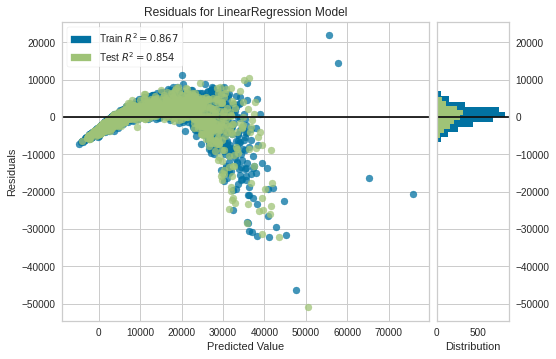

In [32]:
# create a model
lr = create_model('lr')
# plot a model 
plot_model(lr)

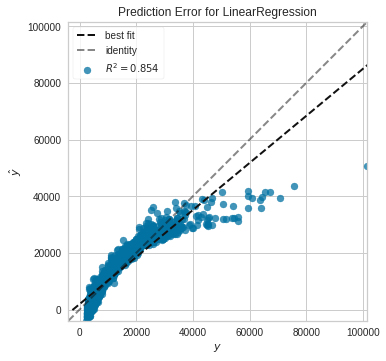

In [33]:
plot_model(lr, plot = 'error')

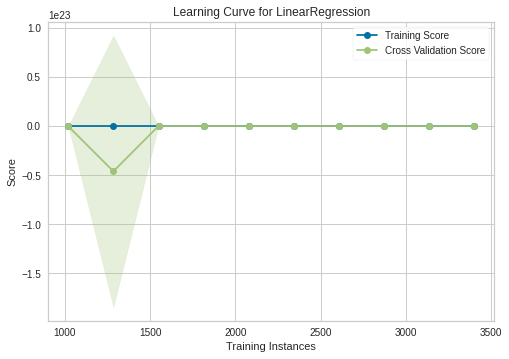

In [34]:
plot_model(lr, plot = 'learning')

#### ___Step 11: Evaluate Model___

```
evaluate(estimator)
```

_This function displays a user interface for all of the available plots for a given estimator._

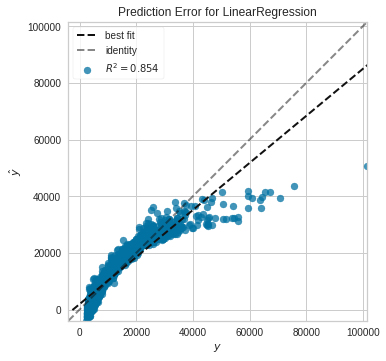

In [35]:
evaluate_model(lr)

#### ___Step 12: Interpret Model___

```
interpret_model(estimator, plot = ‘summary’, feature = None, observation = None)
```

_This function takes a trained model object and returns an interpretation plot based on the test / hold-out set. It only supports tree based algorithms. This function is implemented based on the SHAP (SHapley Additive exPlanations), which is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations._

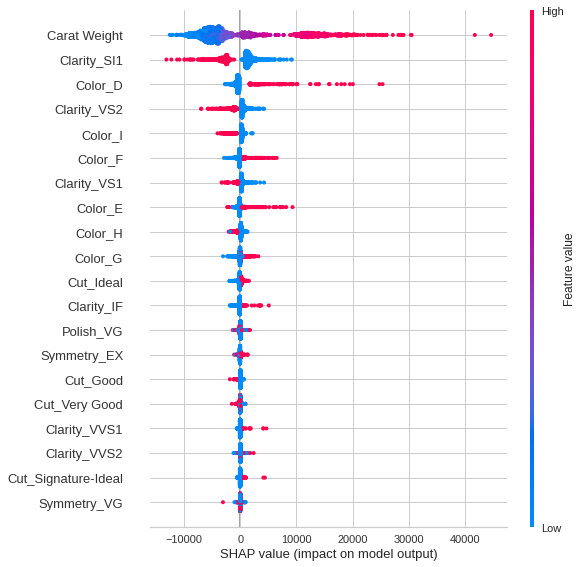

In [36]:
interpret_model(tuned_dt)

### ___Model Finalizing___

#### ___Step 13: Predict Model___

_This function is used to predict new data using a trained estimator. It accepts an estimator created using one of the function in pycaret that returns a trained  model object or a list of trained model objects created using stack_models() or create_stacknet(). New unseen data can be passed to data param as pandas Dataframe.  If data is not passed, the test / hold-out set separated at the time of setup() is used to generate predictions._

```
predict_model(estimator, data=None, platform=None, authentication=None, round=4)
```



In [37]:
# generate predictions on holdout
dt_predictions_holdout = predict_model(tuned_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1113.0725,6.093647e+06,2468.5313,0.9468,0.1287,0.0837


#### ___Step 14: Finalize Model___

```
finalize_model(estimator)
```

_This function fits the estimator onto the complete dataset passed during the setup() stage. The purpose of this function is to prepare for final model deployment after experimentation._

In [0]:
# finalize model
tuned_dt_final = finalize_model(tuned_dt)

In [39]:
print(tuned_dt_final)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=17,
                      max_features=16, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2405, splitter='best')


#### ___Step 15: Predicting final output___

In [40]:
unseen_predictions = predict_model(tuned_dt_final, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.21,Ideal,G,VVS1,EX,EX,GIA,11572,11040.0000
1,2.00,Ideal,I,SI1,EX,VG,GIA,16775,16054.0000
2,1.51,Good,F,SI1,VG,G,GIA,10429,10176.6667
3,0.90,Ideal,F,SI1,EX,EX,GIA,4523,4325.0000
4,1.01,Very Good,I,SI1,VG,VG,GIA,4375,4201.1429


#### ___Step 16: Saving the Model___

```
save_model(model, model_name, verbose=True)
```

_This function saves the transformation pipeline and trained model object into the current active directory as a pickle file for later use._

In [41]:
save_model(tuned_dt_final,'tuned_dt_final_model')

Transformation Pipeline and Model Succesfully Saved


#### ___Step 17: Loading the Model___


```
load_model(model_name, platform = None, authentication = None, verbose=True)
```

_This function loads a previously saved transformation pipeline and model from the current active directory into the current python environment. Load object must be a pickle file._

In [42]:
saved_final_tuned_dt = load_model('tuned_dt_final_model')

Transformation Pipeline and Model Sucessfully Loaded


#### ___Step 18: Saving and Loading Experiment___

```
save_experiment(experiment_name=None)
```

_This function saves the entire experiment into the current active directory. All outputs using pycaret are internally saved into a binary list which is pickilized when save_experiment() is used._

```
load_experiment(experiment_name)
```

_This function loads a previously saved experiment from the current active directory into current python environment. Load object must be a pickle file._